In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8

In [2]:
fl = pd.read_csv("Rent+Reg.csv", sep=';')
df = pd.read_csv("jobs.csv")

# 1. Структурируйте данные

> Структурируйте данные. Представьте их, например, в виде таблицы «объект-свойство», где по строкам расположены наблюдения, по столбцам — их характеристики.

> Например, для онлайн курсов по строкам может идти каждый анализируемый курс, а по столбцам область, продолжительность, число слушателей и т. д. Для вакансий, наблюдением будет конкретная позиция. Ее характеристиками могут быть сфера деятельности, предлагаемая заработная плата, конкретные требуемые навыки и пр.





In [29]:
fl.head()

,rent,s,floor,rooms,walls,district
0,24000,50.0,5,2,1,1
1,11250,15.0,1,1,0,2
2,30000,69.0,2,2,1,1
3,19500,39.0,12,1,0,4
4,12000,18.0,3,1,1,3


In [ ]:
df.head()

,name,salary_min,salary_max,employer,region,schedule,experience
0,Системный администратор,NaN,39000.0,Neovox,Астраханская область,Сменный график,От 1 года до 3 лет
1,Системный администратор,35000.0,60000.0,"Красное & Белое, розничная сеть",Астраханская область,Полный день,От 1 года до 3 лет
2,Системный администратор,30000.0,NaN,ОА Беркут,Астраханская область,Полный день,От 1 года до 3 лет
3,Системный администратор,22000.0,NaN,ГБПОУ АО АГКПТ,Астраханская область,Полный день,От 1 года до 3 лет
4,Системный администратор,30000.0,40000.0,ГБПОУ АО АГКПТ,Астраханская область,Полный день,От 3 до 6 лет


# 2. Проанализируйте типы данных

> Проанализируйте, какого типа данные представлены в имеющемся наборе (количественные, порядковые, категориальные).



In [30]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      130 non-null    int64  
 1   s         130 non-null    float64
 2   floor     130 non-null    int64  
 3   rooms     130 non-null    int64  
 4   walls     130 non-null    int64  
 5   district  130 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.2 KB


Типы данных для датасета fl:

1.   rent (стоимость аренды квартиры за месяц) - количественый тип
2.   s (площадь квартиры) - количественный тип
3.   floor (этаж, на котором расположена квартира) - порядковый тип
4.   rooms (количество комнат в квартире) - количественный тип
5.   walls (тип стен дома, в котором расположена квартира) - категориальный тип
6.   district (район, в котором расположена квартира) - категориальный тип

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5412 non-null   object 
 1   salary_min  3271 non-null   float64
 2   salary_max  1972 non-null   float64
 3   employer    5412 non-null   object 
 4   region      5412 non-null   object 
 5   schedule    5412 non-null   object 
 6   experience  5412 non-null   object 
dtypes: float64(2), object(5)
memory usage: 296.1+ KB


> <font color='orange'> -> Типы данных для датасета df:</font>

1.   name (наименование вакансии) - категориальный тип
2.   salary_min (нижний порог з/п) - количественный тип
3.   salary_max (верхний порог з/п) - количественный тип
4.   employer (работодатель) - категориальный тип
5.   region (регион, в коором размещена вакансия) - категориальный тип
6.   schedule (график работы) - категориальный тип
7.   experience (требуемый опыт работы) - категориальный тип*

*можно привести к порядковому

# 3. Визуализация данных

> Визуализируйте имеющиеся данные в соответствии с их типом.



## Гистограммы




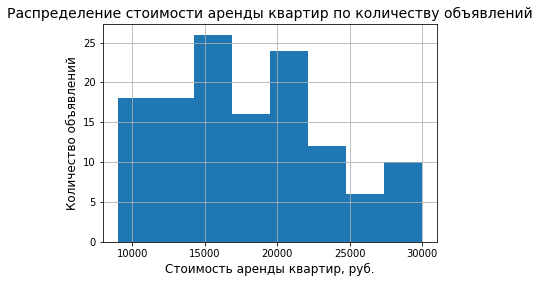

In [ ]:
fl['rent'].hist(bins=8)
plt.title("Распределение стоимости аренды квартир по количеству объявлений", fontsize = 14)
plt.ylabel('Количество объявлений', fontsize = 12) # Подпись оси Y
plt.xlabel('Стоимость аренды квартир, руб.', fontsize = 12) # Подпись оси x
plt.show()

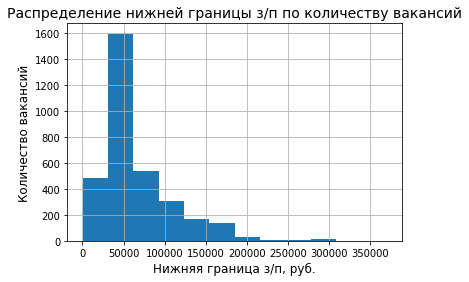

In [ ]:
df['salary_min'].hist(bins=12)
plt.title("Распределение нижней границы з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) # Подпись оси Y
plt.xlabel('Нижняя граница з/п, руб.', fontsize = 12) # Подпись оси x
plt.show()

## Столбчатые диаграммы

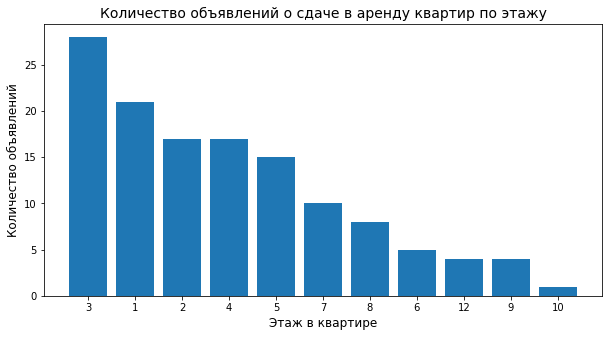

In [ ]:
floor_count = fl['floor'].value_counts()
fig = plt.figure(figsize = (10, 5))
plt.bar( floor_count.index.astype('str'), floor_count)
 
plt.title(label = "Количество объявлений о сдаче в аренду квартир по этажу", fontsize = 14)
plt.ylabel("Количество объявлений",  fontsize = 12)
plt.xlabel( "Этаж в квартире", size = 12)

plt.show()

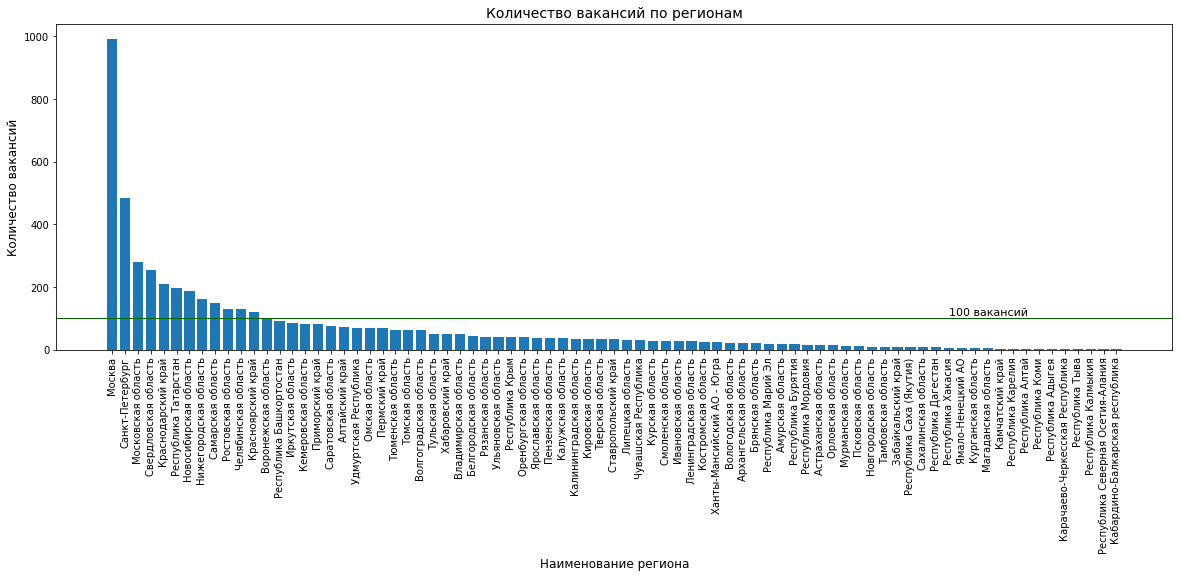

In [ ]:
region_vac_count = df['region'].value_counts()
fig = plt.figure(figsize = (20, 6))
plt.bar( region_vac_count.index, region_vac_count)
 
plt.title(label = "Количество вакансий по регионам", fontsize = 14)
plt.ylabel("Количество вакансий",  fontsize = 12)
plt.xlabel( "Наименование региона", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов

plt.axhline( y=100, color = 'darkgreen', linewidth=1)
plt.text(x=65, y=110,  s='100 вакансий', size=11, color='black')

plt.show()

## Круговые диаграммы

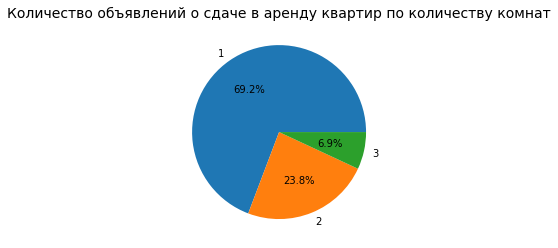

In [ ]:
room_count = fl['rooms'].value_counts()

plt.pie(room_count, labels = room_count.index, autopct='%1.1f%%')
plt.title(label = "Количество объявлений о сдаче в аренду квартир по количеству комнат", fontsize = 14)
plt.show()

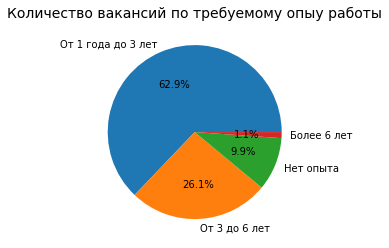

In [ ]:
experience_count = df['experience'].value_counts()

plt.pie(experience_count, labels = experience_count.index, autopct='%1.1f%%')
plt.title(label = "Количество вакансий по требуемому опыу работы", fontsize = 14)
plt.show()

# 4. Гипотеза о виде распределения

> Для количественных показателей проверьте гипотезы о виде распределения.


## Критерий Шапиро-Уилка

> Работает с выборками до 5000 наблюдений


> Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05





In [ ]:
stats.shapiro(fl['rent'])

ShapiroResult(statistic=0.9528542160987854, pvalue=0.0001889327832031995)

In [ ]:
stats.shapiro(df['salary_min'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
stats.shapiro(df['salary_min'].dropna())

ShapiroResult(statistic=0.8163726329803467, pvalue=0.0)

### Волшебное число p-value

p-value - апостериорный уровень значимости

альфа - веротность того, чо получим значение стаистики больше критической

p-value - вероятность того, что получим значение статистики больше чем на выборке

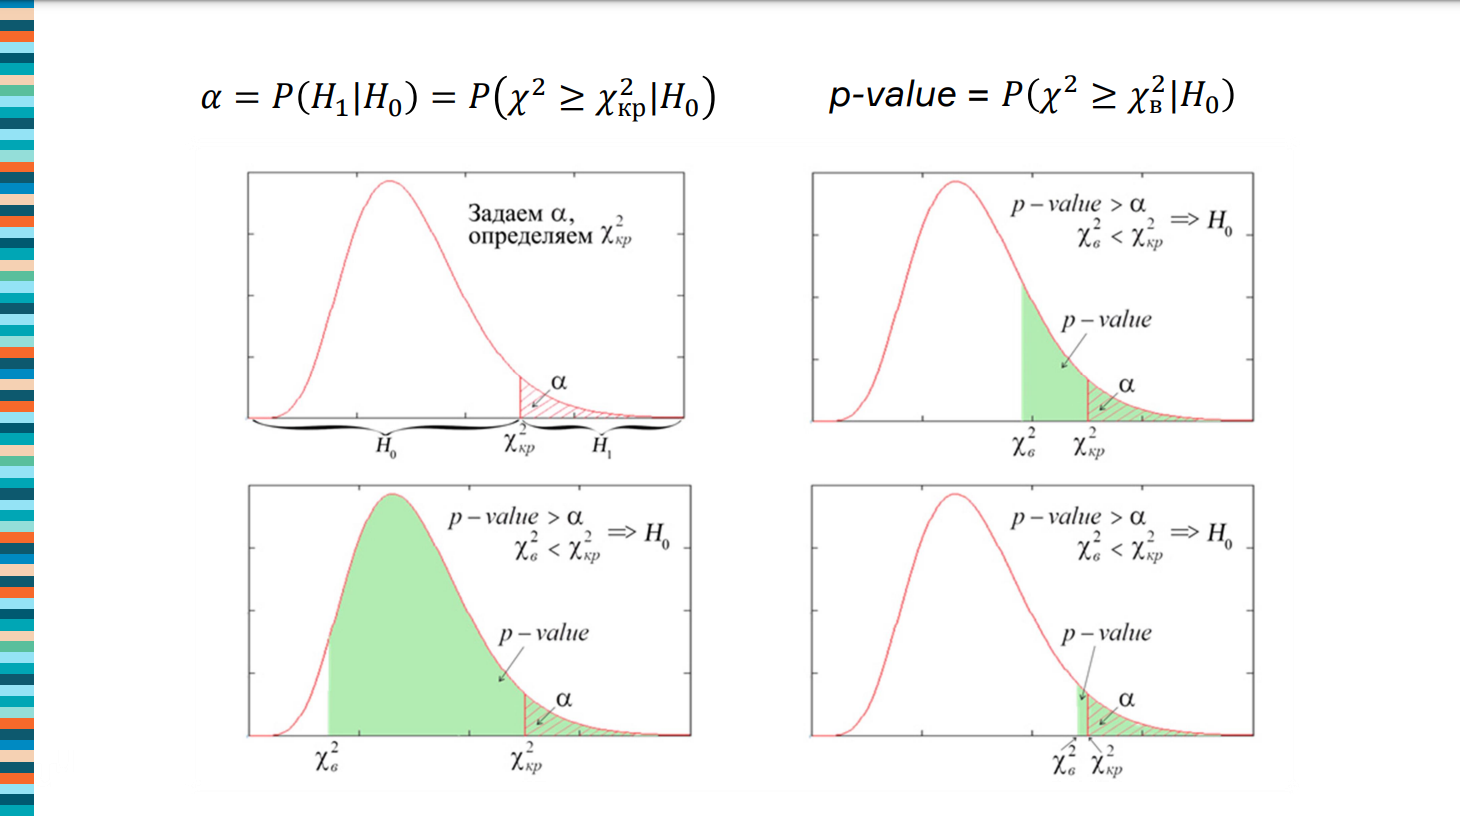

## Критерий асимметрии и эксцесса

> Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)


> Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)





In [ ]:
fl[['rent','s']].skew() # коэффициент асимметрии

rent    0.513098
s       0.328439
dtype: float64

In [ ]:
fl[['rent','s']].kurtosis() # коэффициент эксцесса

rent   -0.374033
s      -0.706654
dtype: float64

## Тест д'Агостино

> вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения, названного по имени Ralph D’Agostino



In [ ]:
stats.normaltest(fl['rent'])

NormaltestResult(statistic=6.459508148613846, pvalue=0.039567228190010524)

# 5. Оценить связь между показателями

> <font color='orange'>В зависимости от типов данных, оцените связь между показателями. Используйте:</font>

*   Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными.
*   Анализ таблиц сопряженности для оценки связи двух категориальных признаков.
*   Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных.

## Критерии сравнения групп 

> Анализ связи количественных или порядковых показателей с категориальными



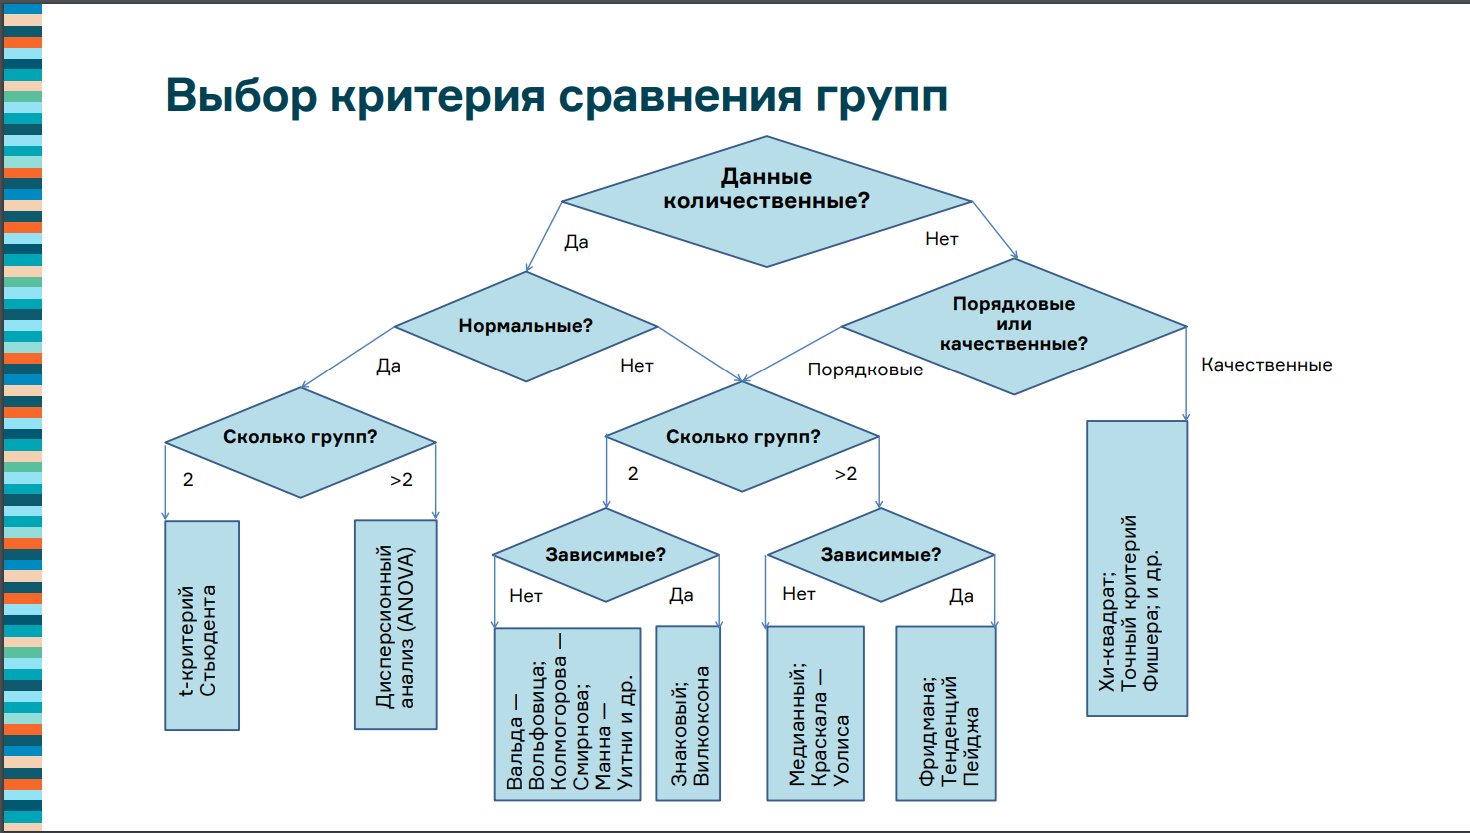

Гипотеза Н0: статистически значимые отличия в группах (тип стен дома) отсутсвуют

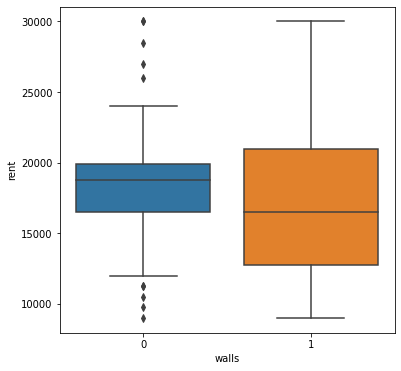

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=fl)

In [ ]:
fl_0 = fl[fl['walls']==0]
fl_1 = fl[fl['walls']==1]
scipy.stats.mannwhitneyu(fl_0['rent'],fl_1['rent'])

MannwhitneyuResult(statistic=2184.5, pvalue=0.14946852885961873)

Так как полученное значение p-value > 0.05 (уровень значимости), то при уровне знамости 0.05 гипотеза Н0 принимается. Следовательно тип стен не значительно влияет на размер арендной платы

### Обработка выбросов

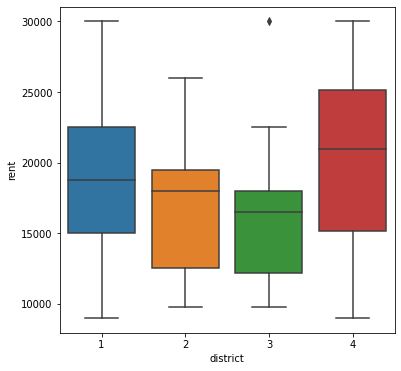

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=fl)

In [ ]:
fl.loc[(fl['rent'] == 30000) & (fl['district'] == 3)]

,rent,s,floor,rooms,walls,district
43,30000,64.0,3,3,0,3


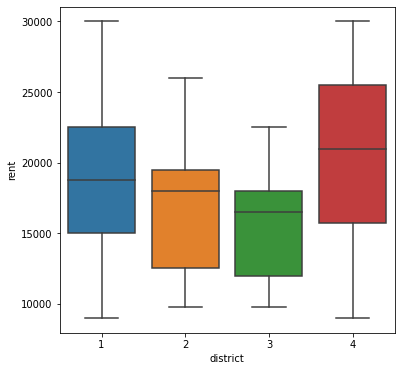

In [ ]:
fl=fl.drop(fl.index[[43]])

f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=fl)

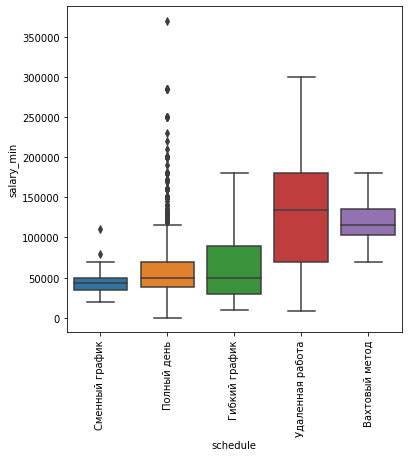

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data=df)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [ ]:
df.loc[(df['schedule'] == 'Полный день') & (df['salary_min'] >130000)]

,name,salary_min,salary_max,employer,region,schedule,experience
49,Программист 1С,150000.0,NaN,Управляющая компания Бамстроймеханизация,Хабаровский край,Полный день,От 1 года до 3 лет
58,Программист 1С,180000.0,200000.0,Компания АКФА,Хабаровский край,Полный день,От 3 до 6 лет
104,Программист 1С,150000.0,NaN,Партнер,Рязанская область,Полный день,От 1 года до 3 лет
129,Системный аналитик,150000.0,NaN,Reelmotion games,Нижегородская область,Полный день,От 1 года до 3 лет
...,...,...,...,...,...,...,...
5162,Программист 1С,150000.0,NaN,Интерком-Л,Челябинская область,Полный день,От 3 до 6 лет
5270,Программист 1С,150000.0,150000.0,Агро-Мастер,Омская область,Полный день,От 3 до 6 лет
5352,Программист 1С,140000.0,160000.0,Автостатус,Кемеровская область,Полный день,От 1 года до 3 лет
5402,Программист 1С,150000.0,NaN,Партнер,Тульская область,Полный день,От 1 года до 3 лет


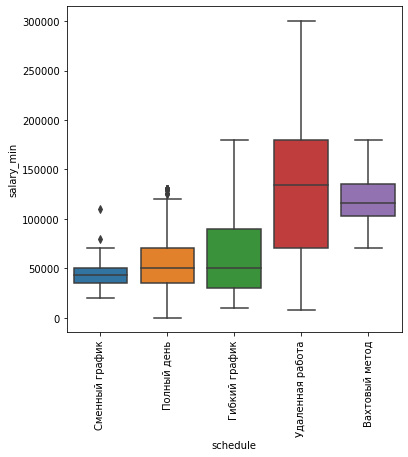

In [ ]:
df1 = df.drop(df.loc[(df['schedule'] == 'Полный день') & (df['salary_min'] > 130000)].index)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data=df1)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

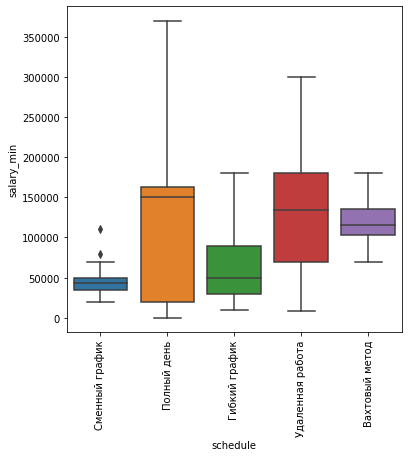

In [16]:
percentile3 = np.percentile(df[df['schedule'] == 'Полный день']['salary_min'].dropna(), 3) # 3% процентиль
percentile97 = np.percentile(df[df['schedule'] == 'Полный день']['salary_min'].dropna(), 97) # 97% процентиль
df = df.drop(df.loc[(df['schedule'] == 'Полный день') & (df['salary_min'] > percentile3) & (df['salary_min'] < percentile97)].index)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data = df)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [17]:
dfd1=np.array(df[df['schedule']=='Сменный график']['salary_min'])
dfd2=np.array(df[df['schedule']=='Полный день']['salary_min'])
dfd3=np.array(df[df['schedule']=='Гибкий график']['salary_min'])
dfd4=np.array(df[df['schedule']=='Удаленная работа']['salary_min'])
dfd5=np.array(df[df['schedule']=='Вахтовый метод']['salary_min'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4,dfd5)

KruskalResult(statistic=80.29901834143264, pvalue=1.505408539879072e-16)

### [Критерий Т Вилкоксона](https://medstatistic.ru/methods/methods3.html)

> непараметрический статистический критерий, используемый для сравнения двух связанных (парных) выборок по уровню какого-либо количественного признака, измеренного в непрерывной или в порядковой шкале.





1.   Вычислить разность между значениями парных измерений для каждого исследуемого. Нулевые сдвиги далее не учитываются.
2.   Определить, какие из разностей являются типичными, то есть соответствуют преобладающему по частоте направлению изменения показателя.
3.   Проранжировать разности пар по их абсолютным значениям (то есть, без учета знака), в порядке возрастания. Меньшему абсолютному значению разности приписывается меньший ранг.
4.   Рассчитать сумму рангов, соответствующих нетипичным сдвигам.

Таким образом, Т-критерий Уилкоксона для связанных выборок рассчитывается по следующей формуле:

T = ΣRr

где ΣRr - сумма рангов, соответствующих нетипичным изменениям показателя.



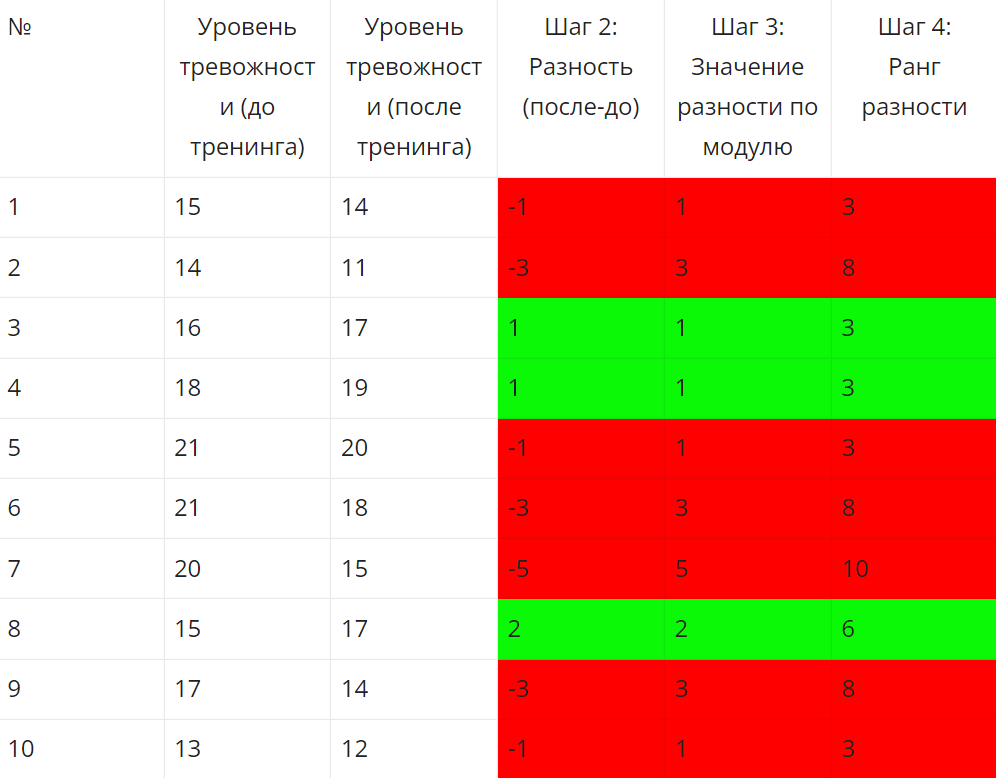

## Анализ таблиц сопряженности

> Оценки связи двух категориальных признаков

> Метод позволяет оценить статистическую значимость различий двух относительных показателей (частот, долей).







In [ ]:
wd=pd.crosstab(fl['walls'],fl['district']); wd

district,1,2,3,4
walls,,,,
0,7,16,13,7
1,27,12,24,22


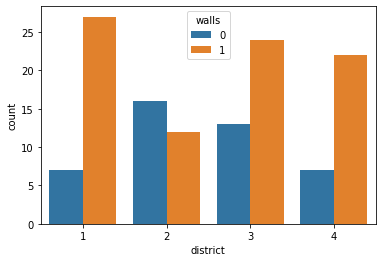

In [ ]:
sns.countplot(x=fl['district'], hue=fl['walls'])

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 10.740121503295127
degrees of freedom: 3
p-value: 0.013217430989963967



### Коэффициент квадратичной сопряженности

> Основным критерием степени связи номинальных переменных является коэффициент квадратичной сопряженности признаков X2 (анализ таблиц сопряженности)


### [Коэффициент Крамера](https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/)

> есть мера связи двух номинальных переменных на основе критерия хи-квадрат. Применяется к таблицам сопряженности произвольной размерности. Вычисляется по формуле:

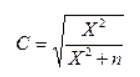,

где χ² - вычисленное по таблице сопряженности значение критерия хи-квадрат;

n - объем выборки;

r - количество строк в таблице сопряженности;

c - количество столбцов в таблице сопряженности.



## Корреляционный анализ Пирсона или Спирмена, Кендалла

> Для количественных или порядковых переменных



### [Коэффициент ранговой корреляции Кендалла](https://www.geeksforgeeks.org/python-kendall-rank-correlation-coefficient/)

> Коэффициент корреляции Кендалла используется в случае, когда переменные представлены двумя порядковыми шкалами при условии, что связанные ранги отсутствуют.



###  [Коэффицент конкордации Кендалла](https://www.rdocumentation.org/packages/synchrony/versions/0.3.8/topics/kendall.w)

> Коэффициент конкордации Кендалла или по-другому Коэффициент множественной ранговой корреляции нужен для того, чтобы выявить согласованность мнений экспертов по нескольким факторам.



# 6. Регрессионная модель

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


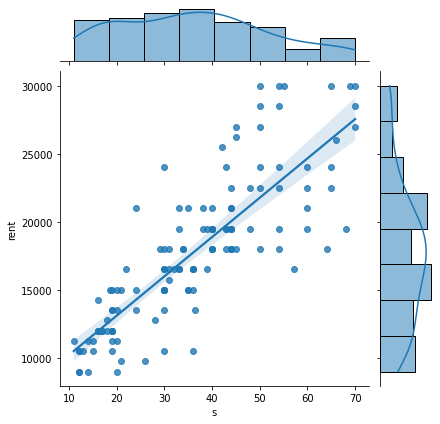

In [ ]:
sns.jointplot('s', 'rent', data=fl, kind="reg")

In [ ]:
results1 = smf.ols('rent ~ s', data=fl).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     287.3
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           1.64e-34
Time:                        13:46:01   Log-Likelihood:                -1228.3
No. Observations:                 130   AIC:                             2461.
Df Residuals:                     128   BIC:                             2466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7177.7576    686.190     10.460      0.000    5820.013    8535.502
s            293.1417     17.295     16.949      0.000     258.920     327.364
==============================================================================
Omnibus:                        4.167   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                4.121
Skew:                           0.240   Prob(JB):                        0.127
Kurtosis:                       3.728   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Вопрос: Что если p-value для свободного члена будет больше альфа? Как его исключать из модели?


In [ ]:
results1 = smf.ols('rent ~ s-1', data=fl).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rent   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              2449.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):                    9.12e-86
Time:                        15:58:18   Log-Likelihood:                         -1268.5
No. Observations:                 130   AIC:                                      2539.
Df Residuals:                     129   BIC:                                      2542.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
s            459.3023      9.281     49.489      0.000     440.940     477.665
==============================================================================
Omnibus:                       13.047   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.878
Skew:                          -0.723   Prob(JB):                     0.000969
Kurtosis:                       3.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Вопрос: что есть такое оценка?

Статистическая оценка — это статистика, которая используется для оценивания неизвестных параметров распределений случайной величины.

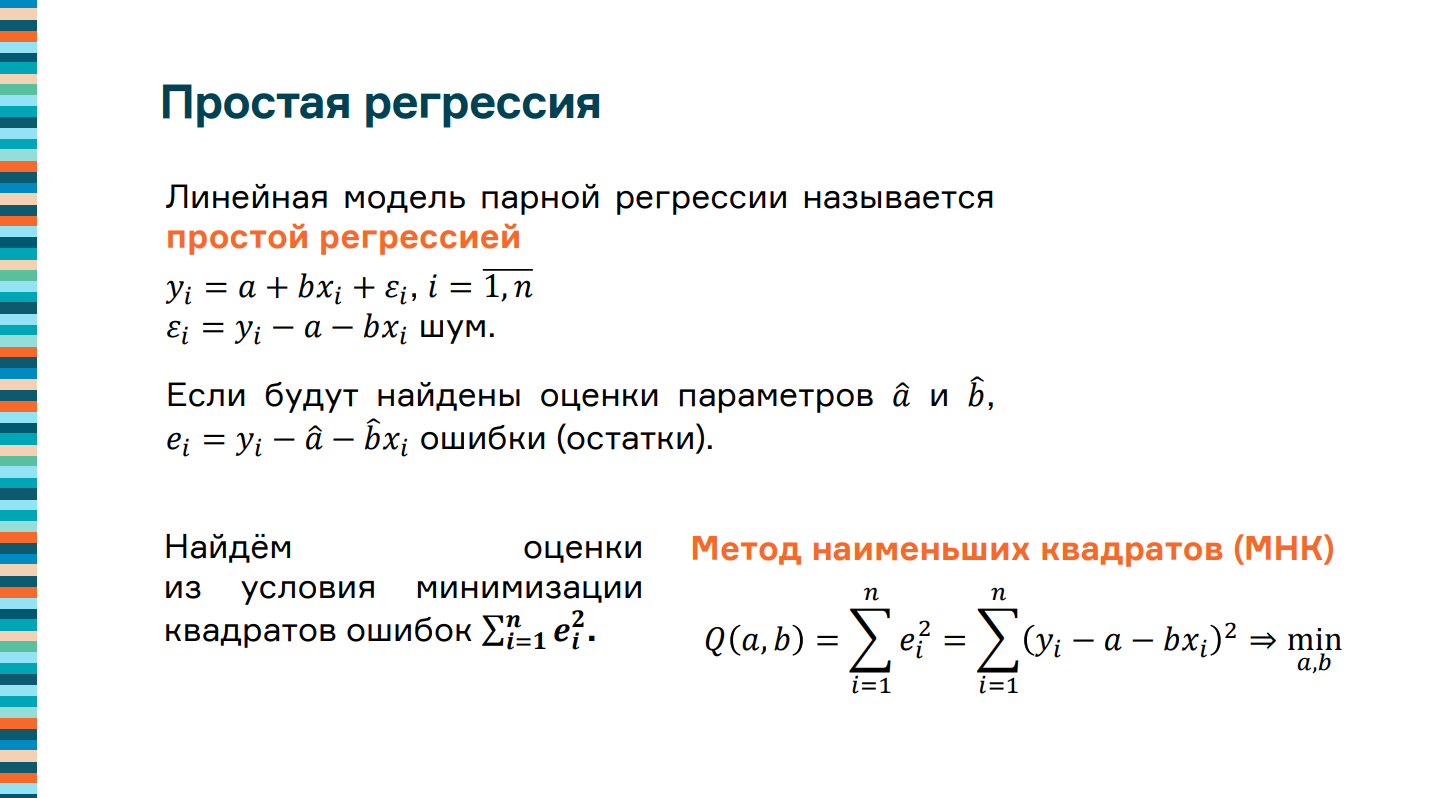

## Квартильная регрессия

> Квантильная регрессия - это просто расширенная версия линейной регрессии. Квантильная регрессия создает взаимосвязь между группой переменных (также известных как независимые переменные) и квантилями (также известными как процентили) зависимых переменных.



Вопрос: По таблице результатов регрессионного анализа мы можем построить прогноз о среднем значении зависимой переменной. Можно ли вместо среднего арифметического получить другое среднее (напр. медиану)?

In [31]:
# fit the model
model = smf.quantreg('rent ~ s', fl).fit(q=0.25)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                   rent   Pseudo R-squared:               0.4661
Model:                       QuantReg   Bandwidth:                       2023.
Method:                 Least Squares   Sparsity:                        6834.
Date:                Wed, 24 Aug 2022   No. Observations:                  130
Time:                        07:53:38   Df Residuals:                      128
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7354.8387    693.687     10.603      0.000    5982.260    8727.418
s            241.9355     17.581     13.761      0.000     207.149     276.722
==============================================================================
"""

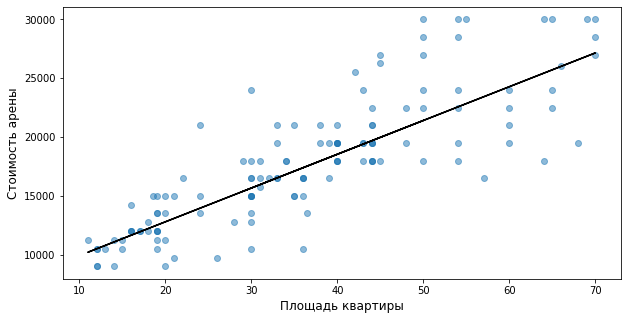

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

y_line = lambda a, b: a + b * fl['s']
y = y_line(model.params['Intercept'], model.params['s'])
 
ax.plot(fl['s'], y, color='black')
ax.scatter(fl['s'], fl['rent'], alpha=.5)
ax.set_xlabel('Площадь квартиры', fontsize=12)
ax.set_ylabel('Стоимость арены', fontsize=12)
fig.show()

## Нелинейная регрессия и линеаризация

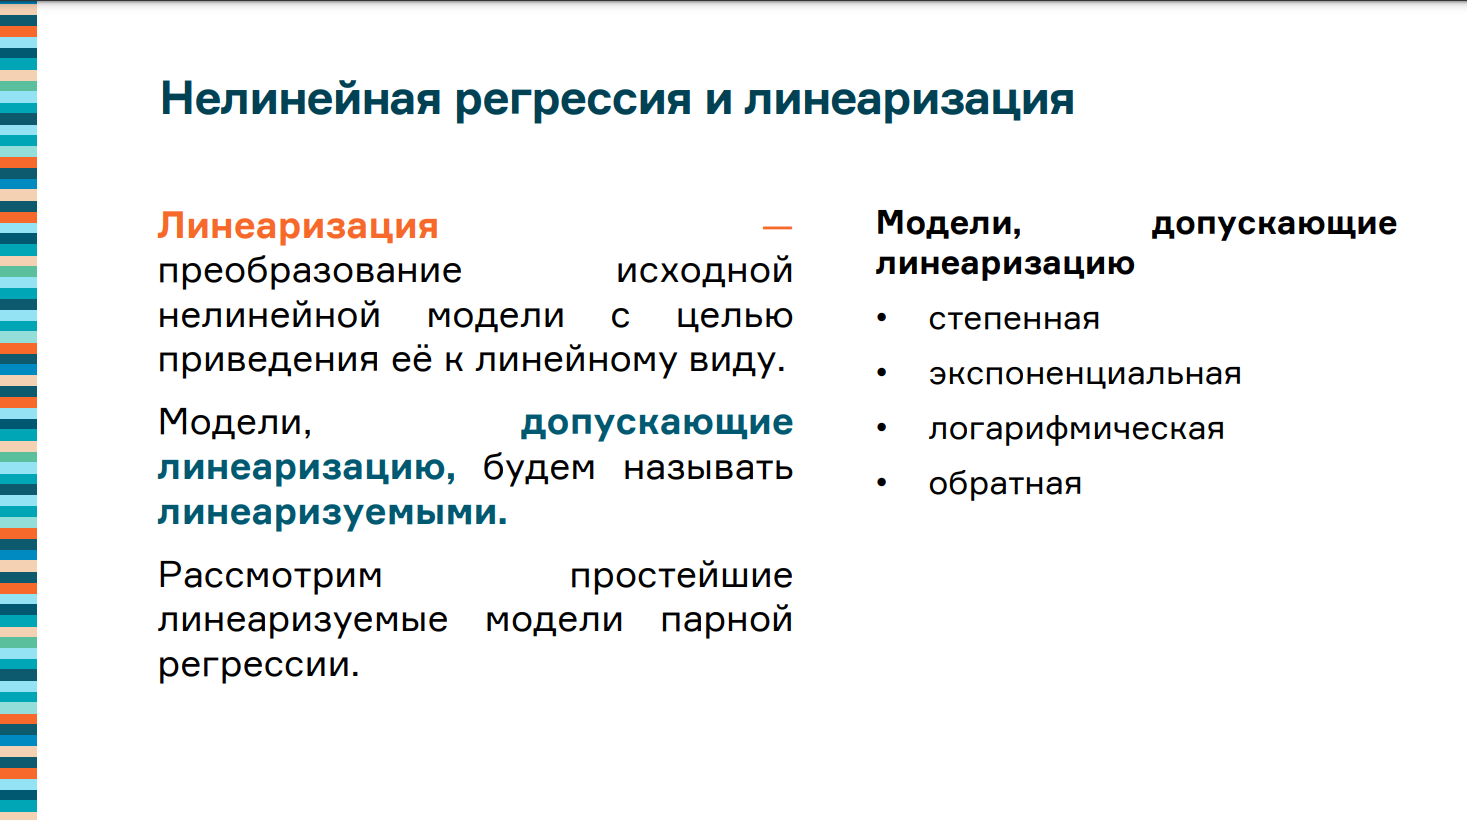

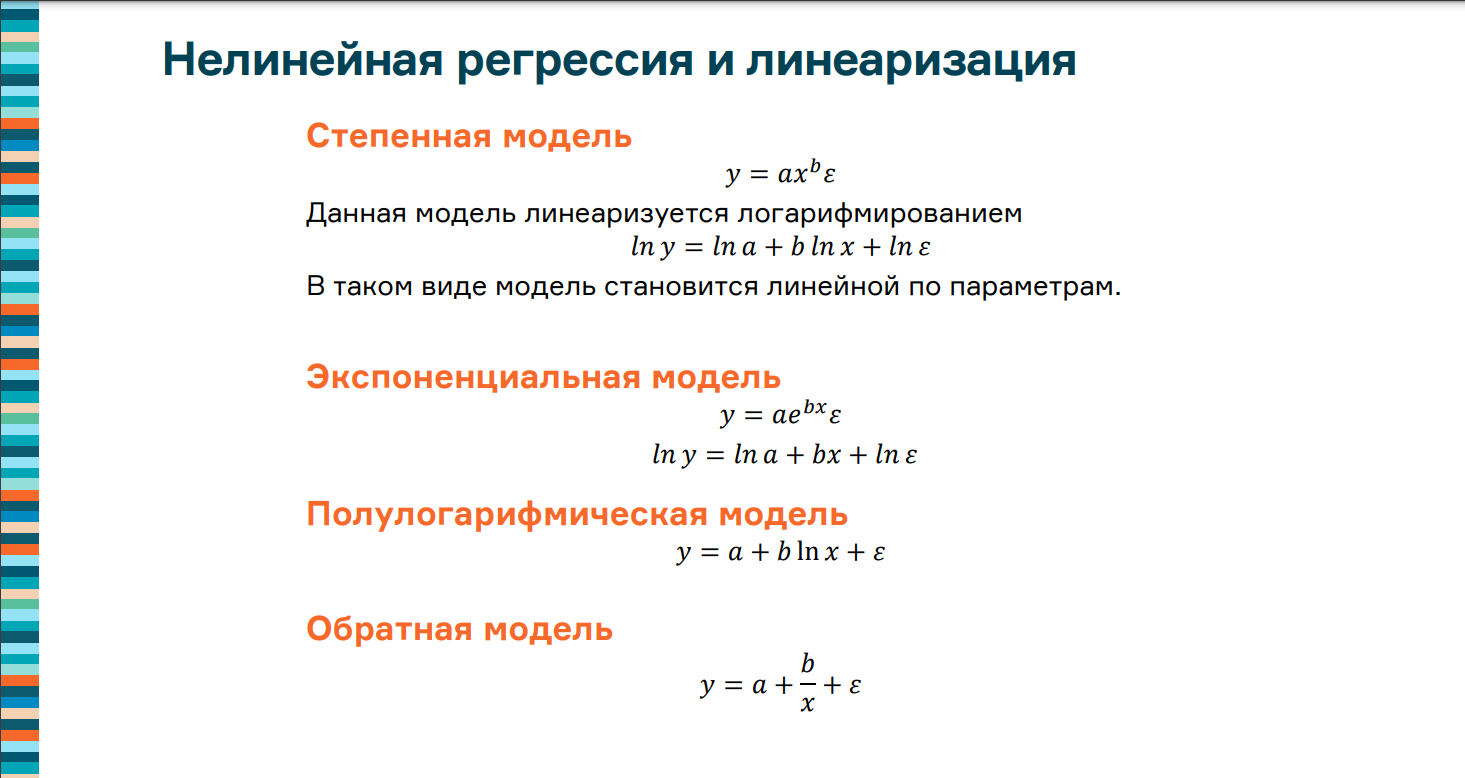

### Отличие логарифмической от полулогарифмической модели

Логарифмическая регрессия — это тип регрессии, используемый для моделирования ситуаций, когда рост или спад сначала быстро ускоряются, а затем со временем замедляются.
Например, следующий график демонстрирует пример логарифмического распада:
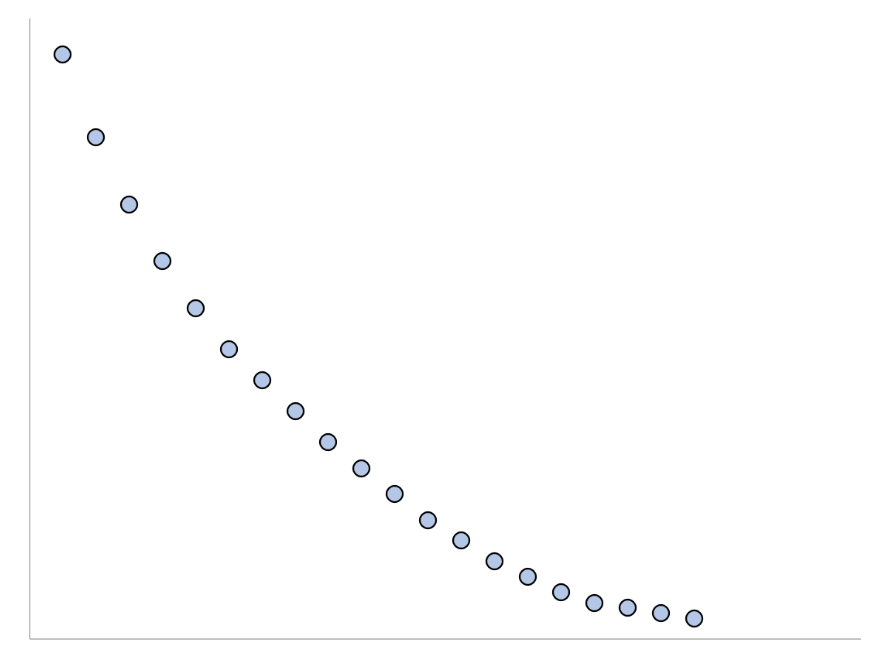

Модели вида

ln Y= β0 + βX + ε, Y= β0 + βlnX+ ε

называются полулогарифмическими моделями.

Такие модели обычно используются в тех случаях, когда необходимо определить темп роста или прироста каких-либо экономических показателей. Например, при анализе банковского вклада по первоначальному вкладу и процентной ставке, при исследовании зависимости прироста объема выпуска от относительного (процентного) увеличения затрат ресурса, бюджетного дефицита от темпа роста ВНП, темп роста инфляции от объема денежной массы и т.д.

# Модель множественной регрессии

Вопрос: В примере лекции по множес военной регрессии использовались количественные и ранговые данные,  а также один категориальный (тип стен),  закодированный 0 и 1. Вопрос: можно ли использовать категориальные данные,  закодированные,  скажем,  1,2,3,4.  Или их надо будет перевести в четыре столбика закодированные как в задаче,  приведённой далее в ols:1000, 0100, 0010, 0001.


Вопрос: Как работать с категориальной переменной у которой много уникальных значений. На примере наших данных, переменная Вакансия и Регион. Как её кодировать? Нужно ли работать со всеми значениями или можно брать выборочные?

# 7. Классификация

Вопрос:	Не было четкого строгого определения линейной разделимости. Нельзя ли услышать

Ответ: Линейная разделимость — это свойство двух множеств векторов в многомерном пространстве: два множества являются линейно разделимыми, если существует хотя бы одна прямая на плоскости, для которой все точки одного множества расположены с одной стороны, а другого — с другой. Данное определение обобщается на пространства большей размерности, если прямая заменяется на гиперплоскость

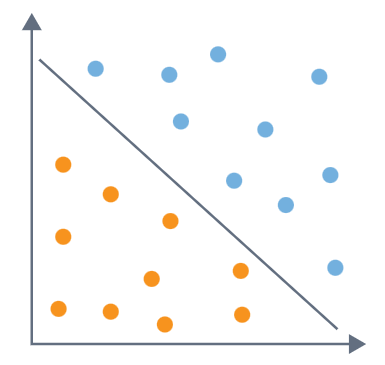

Пример линейно неразделимых множеств

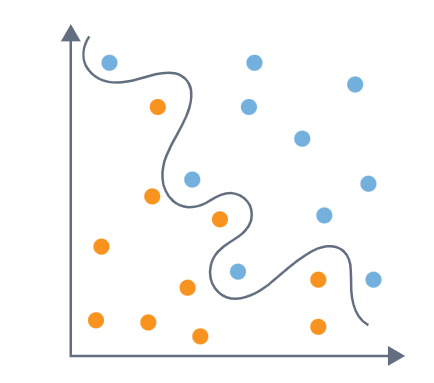

Вопрос:	В лекции про задачи классификации прозвучала фраза: "когда x это набор признаков, они могут быть разной природы". А если это только один признак? Он может быть порядковым или категориальным?

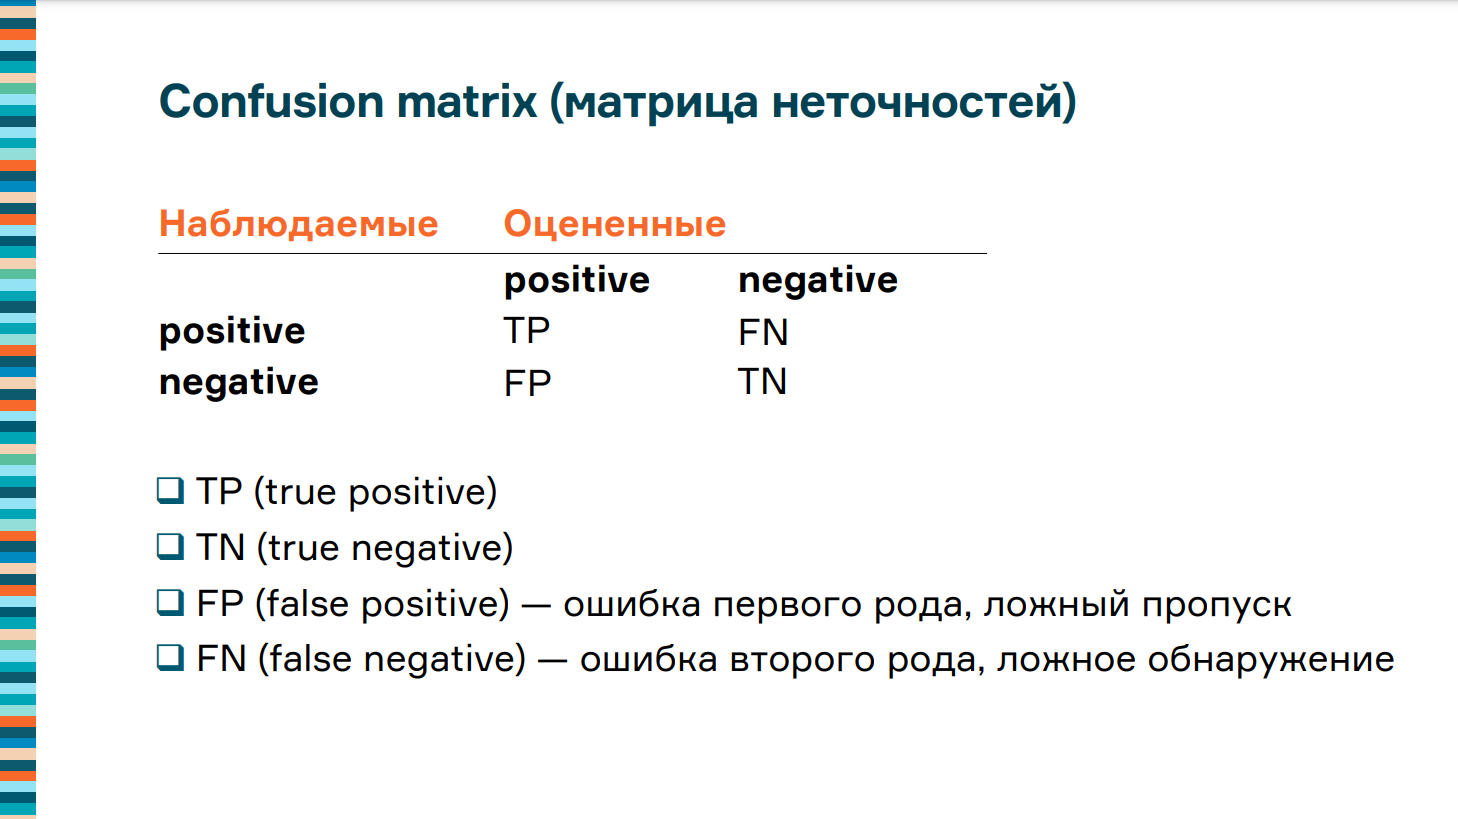

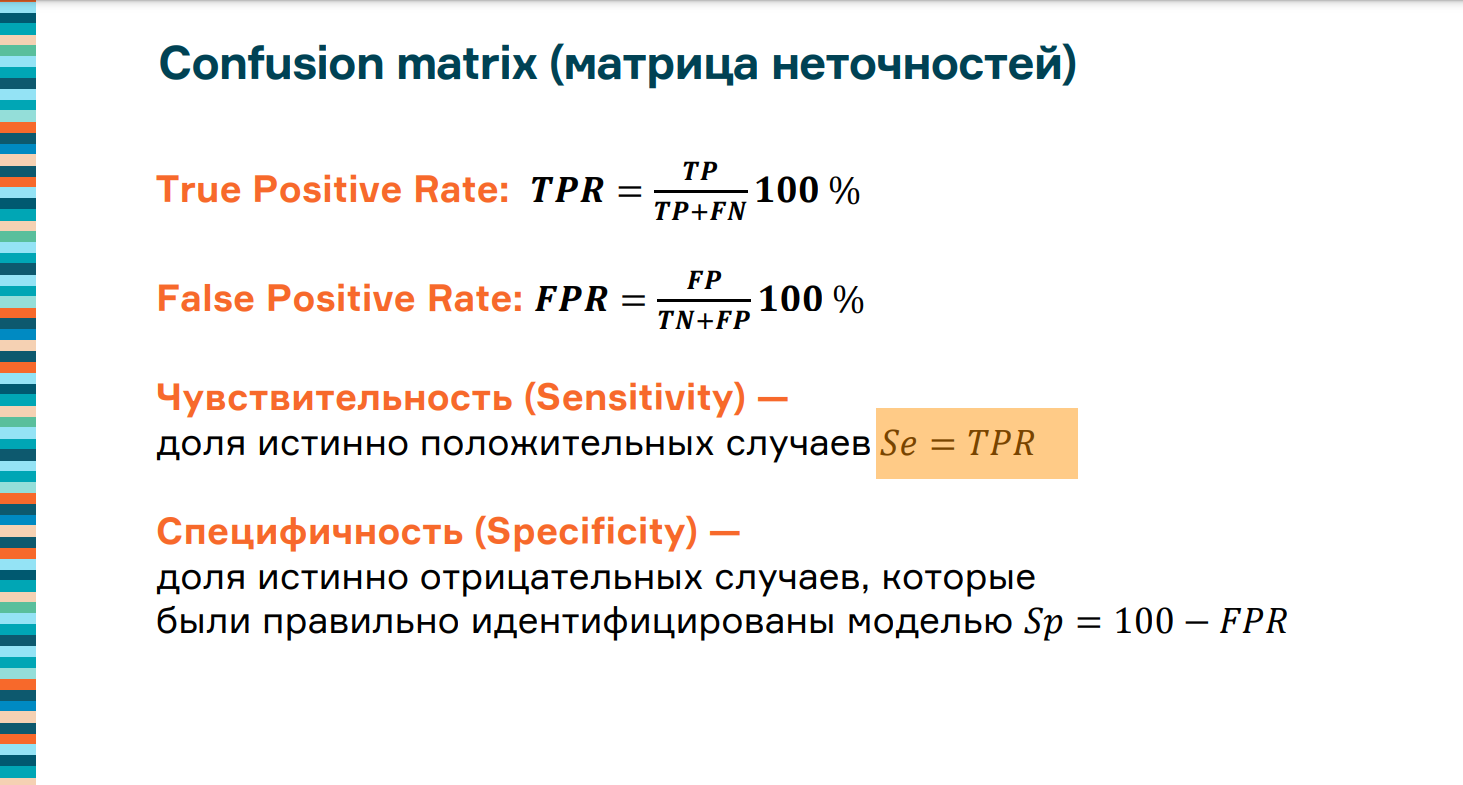

Чувствительность (Se) - это способность диагностического метода давать правильный результат, то есть способность обнаруживать наблюдения единичного класса как только появились хоть какие-то подозрения о его принадлежности к данному классу